<a href="https://www.kaggle.com/code/mosesmoncy/bank-marketing-campaign-prediction?scriptVersionId=126869358" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.


Input variables:

bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

other attributes:

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
a=pd.read_csv('/kaggle/input/bank-marketing-dataset/bank_additional_full.csv')
a

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,True
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,False
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,False
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,True


In [3]:
# read first five data

a.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False


In [4]:
# read last five data

a.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,True
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,False
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,False
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,True
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,False


In [5]:
a.shape

(41188, 21)

In [6]:
a.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                    bool
dtype: object

In [7]:
a.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [8]:
# default has "unknown values"

a["default"].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

THERE ARE 10 COLUMNS WHICH ARE OBJECT DATATYPES

In [9]:
a.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                    bool
dtype: object

In [10]:
# Implementing get_dummies encoding technique

cols=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
a1=pd.get_dummies(a[cols],drop_first=True)

In [11]:
a1

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41184,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41185,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41186,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [12]:
# joining actual dataset (a) and encoded dataset (a1)

a2=pd.concat([a,a1],axis=1)
a2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0,1,0,0,0,0,0,0,1,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0,1,0,0,0,0,0,0,1,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0,1,0,0,0,0,0,0,1,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0,1,0,0,0,0,0,0,1,0


In [13]:
a2.dtypes

age                      int64
job                     object
marital                 object
education               object
default                 object
                         ...  
day_of_week_thu          uint8
day_of_week_tue          uint8
day_of_week_wed          uint8
poutcome_nonexistent     uint8
poutcome_success         uint8
Length: 64, dtype: object

In [14]:
# dropping off all the object datatypes columns

a2=a2.drop(['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'],axis=1)

In [15]:
a2

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0


In [16]:
a2.dtypes

age                                int64
duration                           int64
campaign                           int64
pdays                              int64
previous                           int64
emp_var_rate                     float64
cons_price_idx                   float64
cons_conf_idx                    float64
euribor3m                        float64
nr_employed                      float64
y                                   bool
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services                       uint8
job_student                        uint8
job_technician                     uint8
job_unemployed                     uint8
job_unknown                        uint8
marital_married                    uint8
marital_single                     uint8
marital_unknown 

In [17]:
# checking missing values present or not

a2.isna().sum()

age                              0
duration                         0
campaign                         0
pdays                            0
previous                         0
emp_var_rate                     0
cons_price_idx                   0
cons_conf_idx                    0
euribor3m                        0
nr_employed                      0
y                                0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

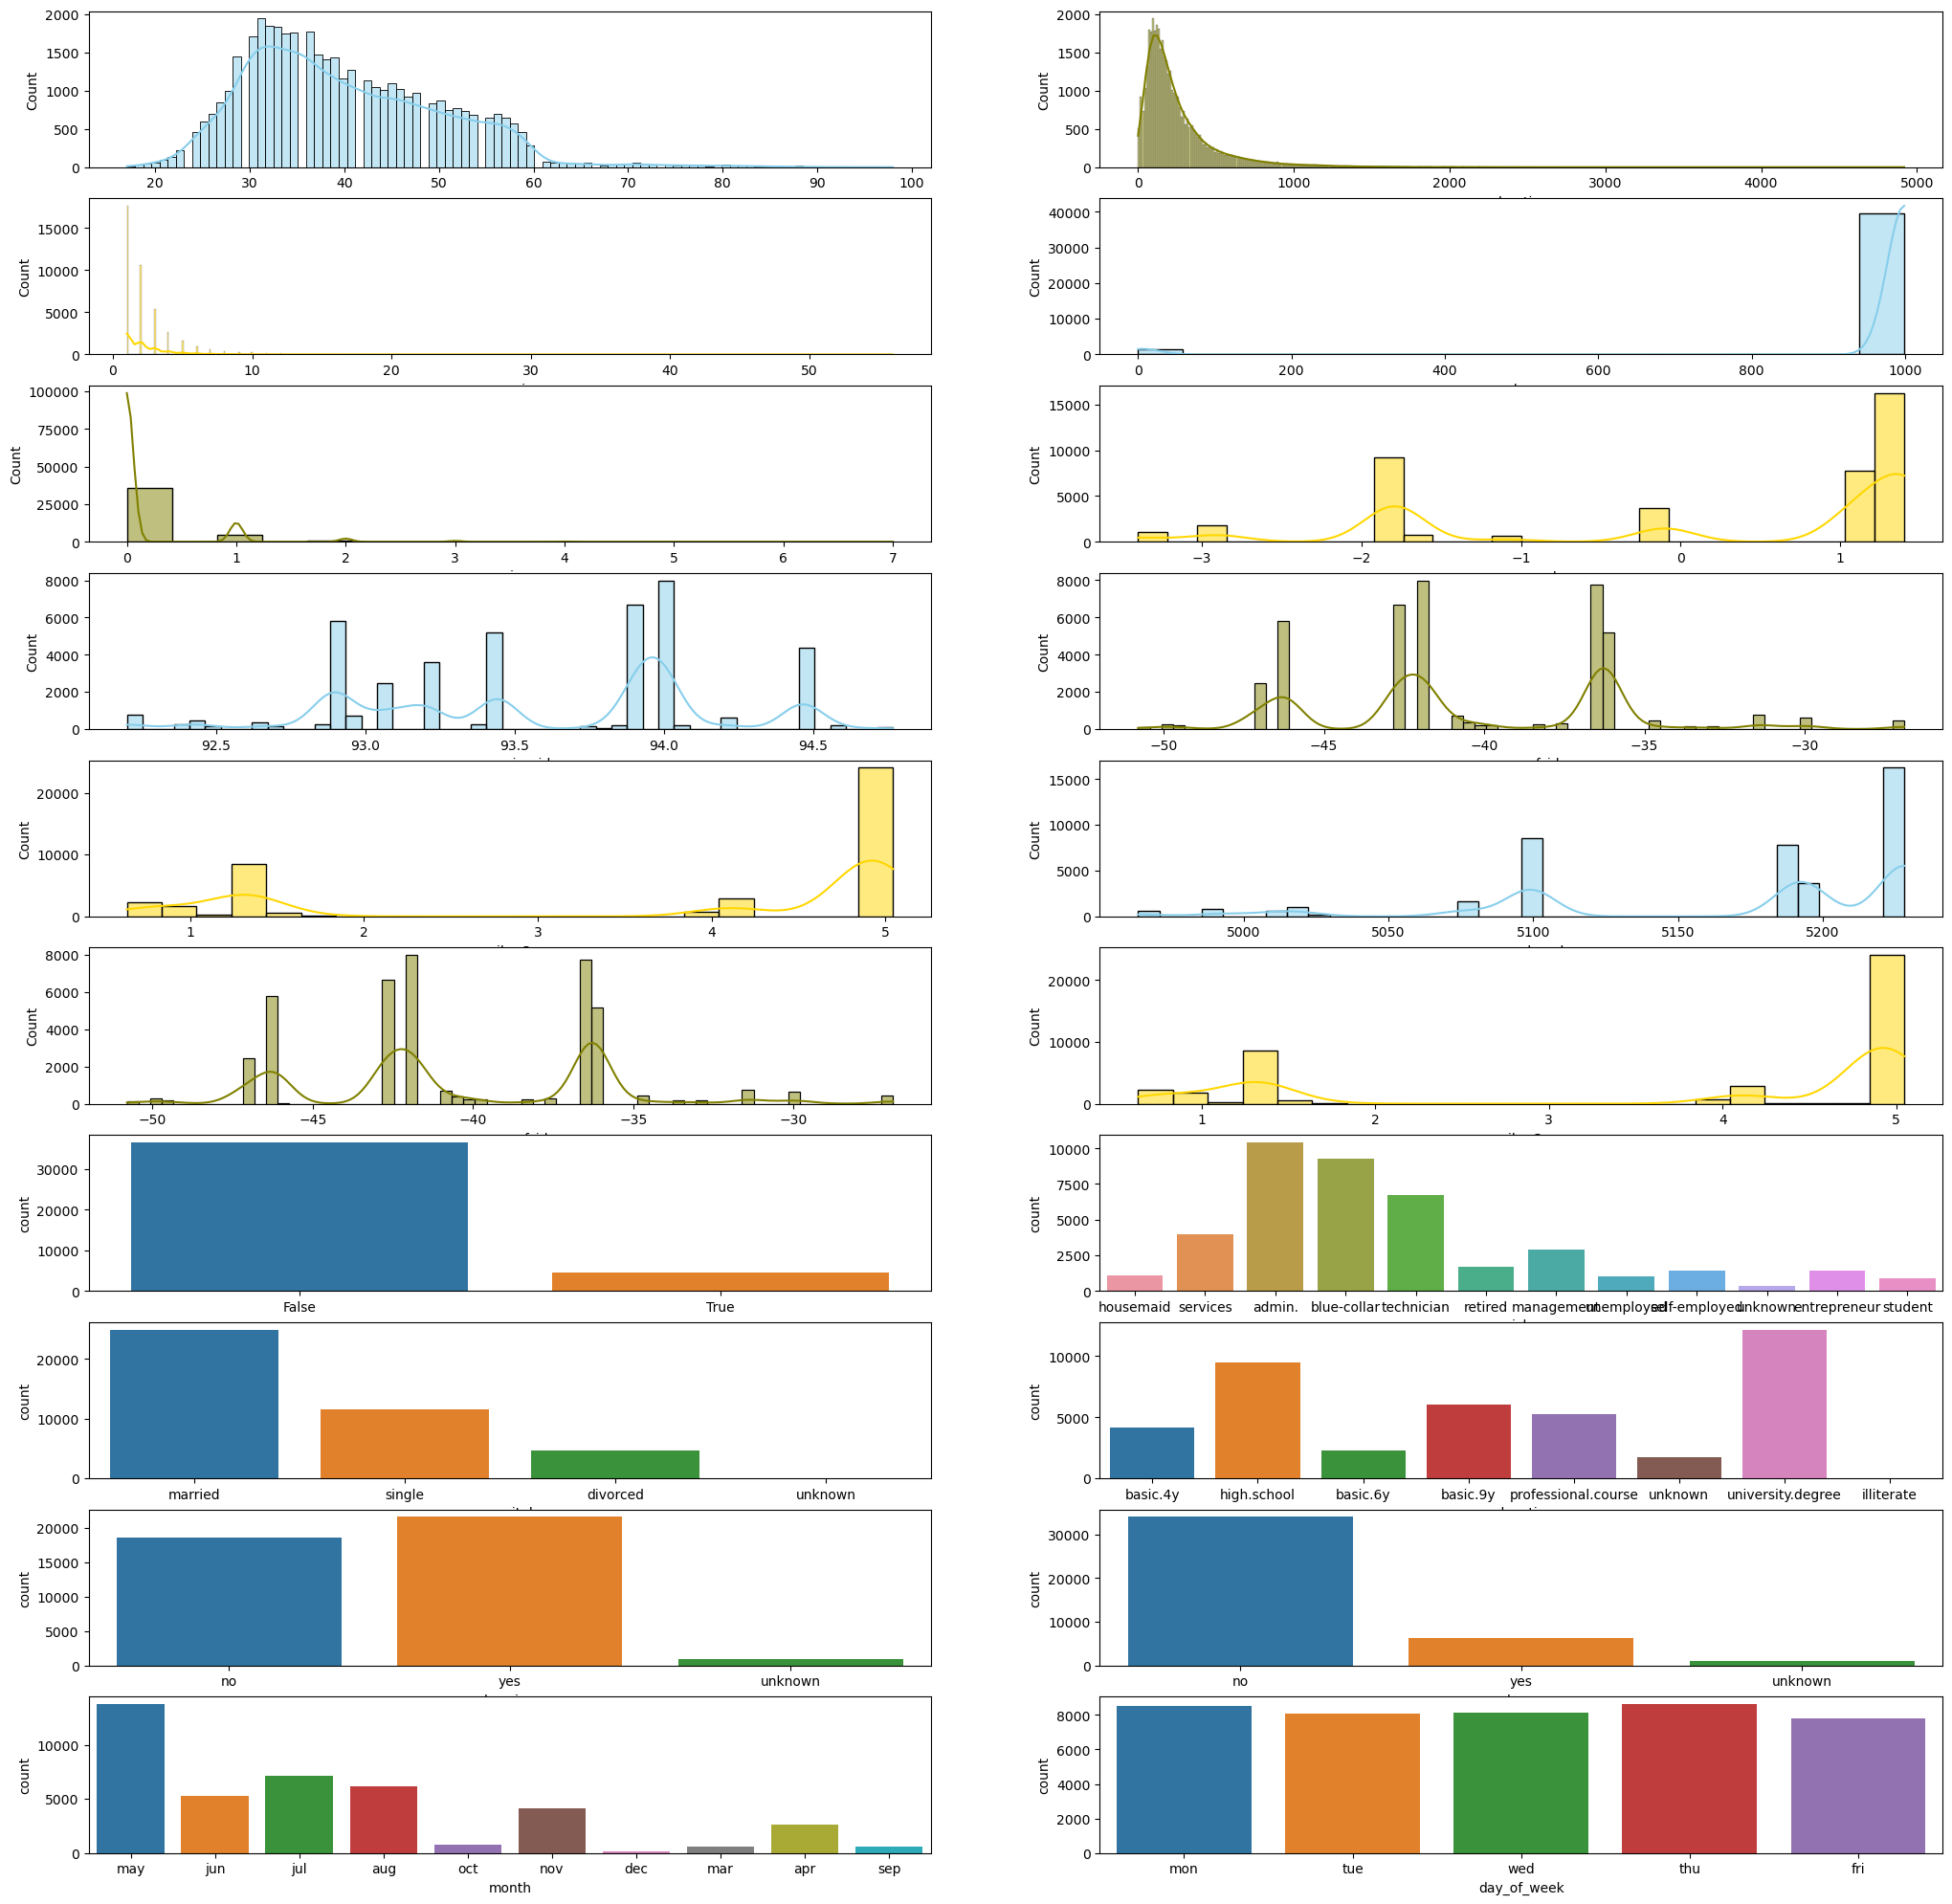

In [18]:
fig, axs = plt.subplots(10, 2, figsize=(25, 25))
sns.histplot(data=a["age"], kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=a["duration"], kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=a["campaign"], kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=a["pdays"], kde=True, color="skyblue", ax=axs[1, 1])
sns.histplot(data=a["previous"], kde=True, color="olive", ax=axs[2, 0])
sns.histplot(data=a["emp_var_rate"], kde=True, color="gold", ax=axs[2, 1])
sns.histplot(data=a["cons_price_idx"], kde=True, color="skyblue", ax=axs[3, 0])
sns.histplot(data=a["cons_conf_idx"], kde=True, color="olive", ax=axs[3, 1])
sns.histplot(data=a["euribor3m"], kde=True, color="gold", ax=axs[4, 0])
sns.histplot(data=a["nr_employed"], kde=True, color="skyblue", ax=axs[4, 1])
sns.histplot(data=a["cons_conf_idx"], kde=True, color="olive", ax=axs[5, 0])
sns.histplot(data=a["euribor3m"], kde=True, color="gold", ax=axs[5, 1])
sns.countplot(x = a["y"], ax=axs[6, 0])
sns.countplot(x = a["job"], ax=axs[6, 1])
sns.countplot(x = a["marital"], ax=axs[7, 0])
sns.countplot(x = a["education"], ax=axs[7, 1])
sns.countplot(x = a["housing"], ax=axs[8, 0])
sns.countplot(x = a["loan"], ax=axs[8, 1])
sns.countplot(x = a["month"], ax=axs[9, 0])
sns.countplot(x = a["day_of_week"], ax=axs[9, 1])



In [19]:
# splitting dataset   x(inputs) & y(output)

x=a2.drop(['y'],axis=1)
y=a2['y']
y

0        False
1        False
2        False
3        False
4        False
         ...  
41183     True
41184    False
41185    False
41186     True
41187    False
Name: y, Length: 41188, dtype: bool

In [20]:
x

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,1,0,0,0,0,0,0,1,0


<AxesSubplot:ylabel='y'>

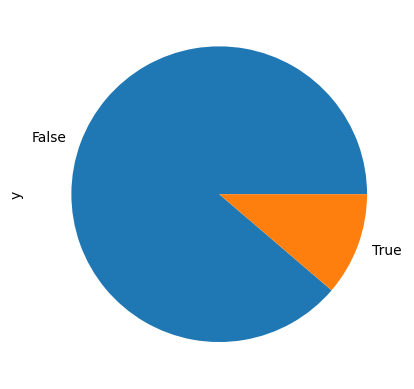

In [21]:
a2['y'].value_counts().plot(kind='pie')

In [22]:
# implementing train test split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
39075,29,77,3,999,1,-3.0,92.713,-33.0,0.709,5023.5,...,0,0,0,0,1,0,0,0,0,0
34855,29,12,4,999,0,-1.8,92.893,-46.2,1.250,5099.1,...,1,0,0,0,0,0,0,0,1,0
7107,45,277,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,1,0,0,0,0,1,0,0,1,0
31614,34,70,1,999,1,-1.8,92.893,-46.2,1.327,5099.1,...,1,0,0,0,0,1,0,0,0,0
34878,32,1181,9,999,0,-1.8,92.893,-46.2,1.250,5099.1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,58,427,2,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,0,1,0,1,0
11284,37,288,1,999,0,1.4,94.465,-41.8,4.961,5228.1,...,0,0,0,0,0,1,0,0,1,0
38158,35,194,1,4,1,-3.4,92.431,-26.9,0.754,5017.5,...,0,0,1,0,0,1,0,0,0,1
860,40,295,2,999,0,1.1,93.994,-36.4,4.856,5191.0,...,1,0,0,0,0,0,0,1,1,0


In [23]:
y_train

39075    False
34855    False
7107     False
31614    False
34878    False
         ...  
6265     False
11284    False
38158     True
860      False
15795    False
Name: y, Length: 28831, dtype: bool

PREPROCESSING USING STANDARD SCALER

In [24]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

scalar.fit(x_train)

x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)

In [25]:
# Since it is a classification model,we implememt all the 5 classification algorithms

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model1=KNeighborsClassifier(n_neighbors=9,weights='uniform')
model2=GaussianNB()
model3=SVC()
model4=DecisionTreeClassifier(criterion='entropy')
model5=RandomForestClassifier(n_estimators=100)

modellist=[model1,model2,model3,model4,model5]

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

for i in modellist:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print('the classification details of model',i,'is below')
    print('the confusion matrix of ',i,'is')
    print( confusion_matrix(y_test,y_pred))
    print('accuracy score of',i,'is')
    print(accuracy_score(y_test,y_pred))
    print('the classification report of',i,'is')
    print(classification_report(y_test,y_pred))
          

the classification details of model KNeighborsClassifier(n_neighbors=9) is below
the confusion matrix of  KNeighborsClassifier(n_neighbors=9) is
[[10707   261]
 [  982   407]]
accuracy score of KNeighborsClassifier(n_neighbors=9) is
0.8994092417253379
the classification report of KNeighborsClassifier(n_neighbors=9) is
              precision    recall  f1-score   support

       False       0.92      0.98      0.95     10968
        True       0.61      0.29      0.40      1389

    accuracy                           0.90     12357
   macro avg       0.76      0.63      0.67     12357
weighted avg       0.88      0.90      0.88     12357

the classification details of model GaussianNB() is below
the confusion matrix of  GaussianNB() is
[[10958    10]
 [ 1379    10]]
accuracy score of GaussianNB() is
0.8875940762320952
the classification report of GaussianNB() is
              precision    recall  f1-score   support

       False       0.89      1.00      0.94     10968
        True    

RandomForestClassifier() model has the highest accuracy of 91.4%

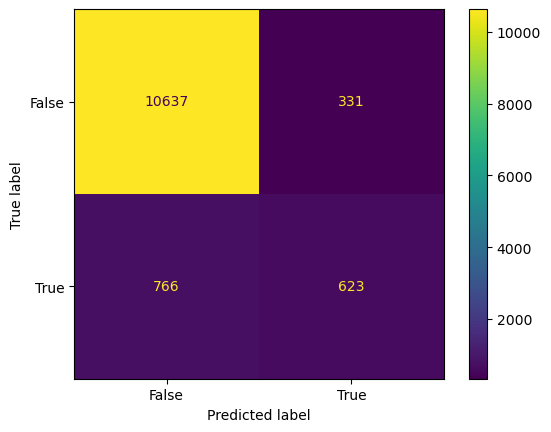

In [27]:
# to plot the confusin matrix

from sklearn.metrics._plot.confusion_matrix  import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred)
cm=['False','True']   # we should place the class labels according to the data set
cmd=ConfusionMatrixDisplay(result,display_labels=cm)
cmd.plot()

In [28]:
a.corr()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons_price_idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr_employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


<AxesSubplot:>

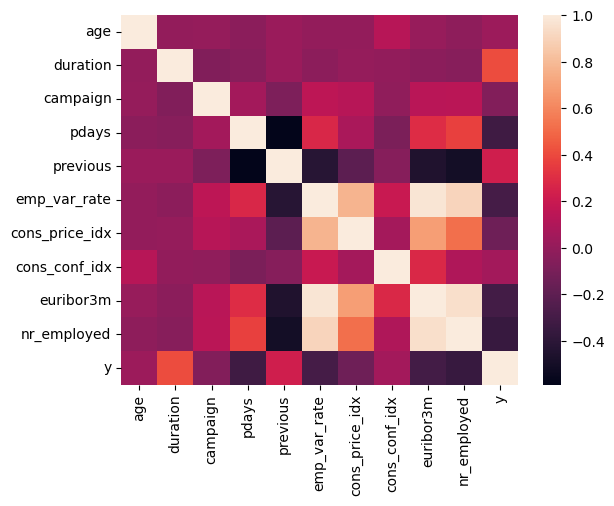

In [29]:
sns.heatmap(a.corr())

<AxesSubplot:xlabel='y', ylabel='nr_employed'>

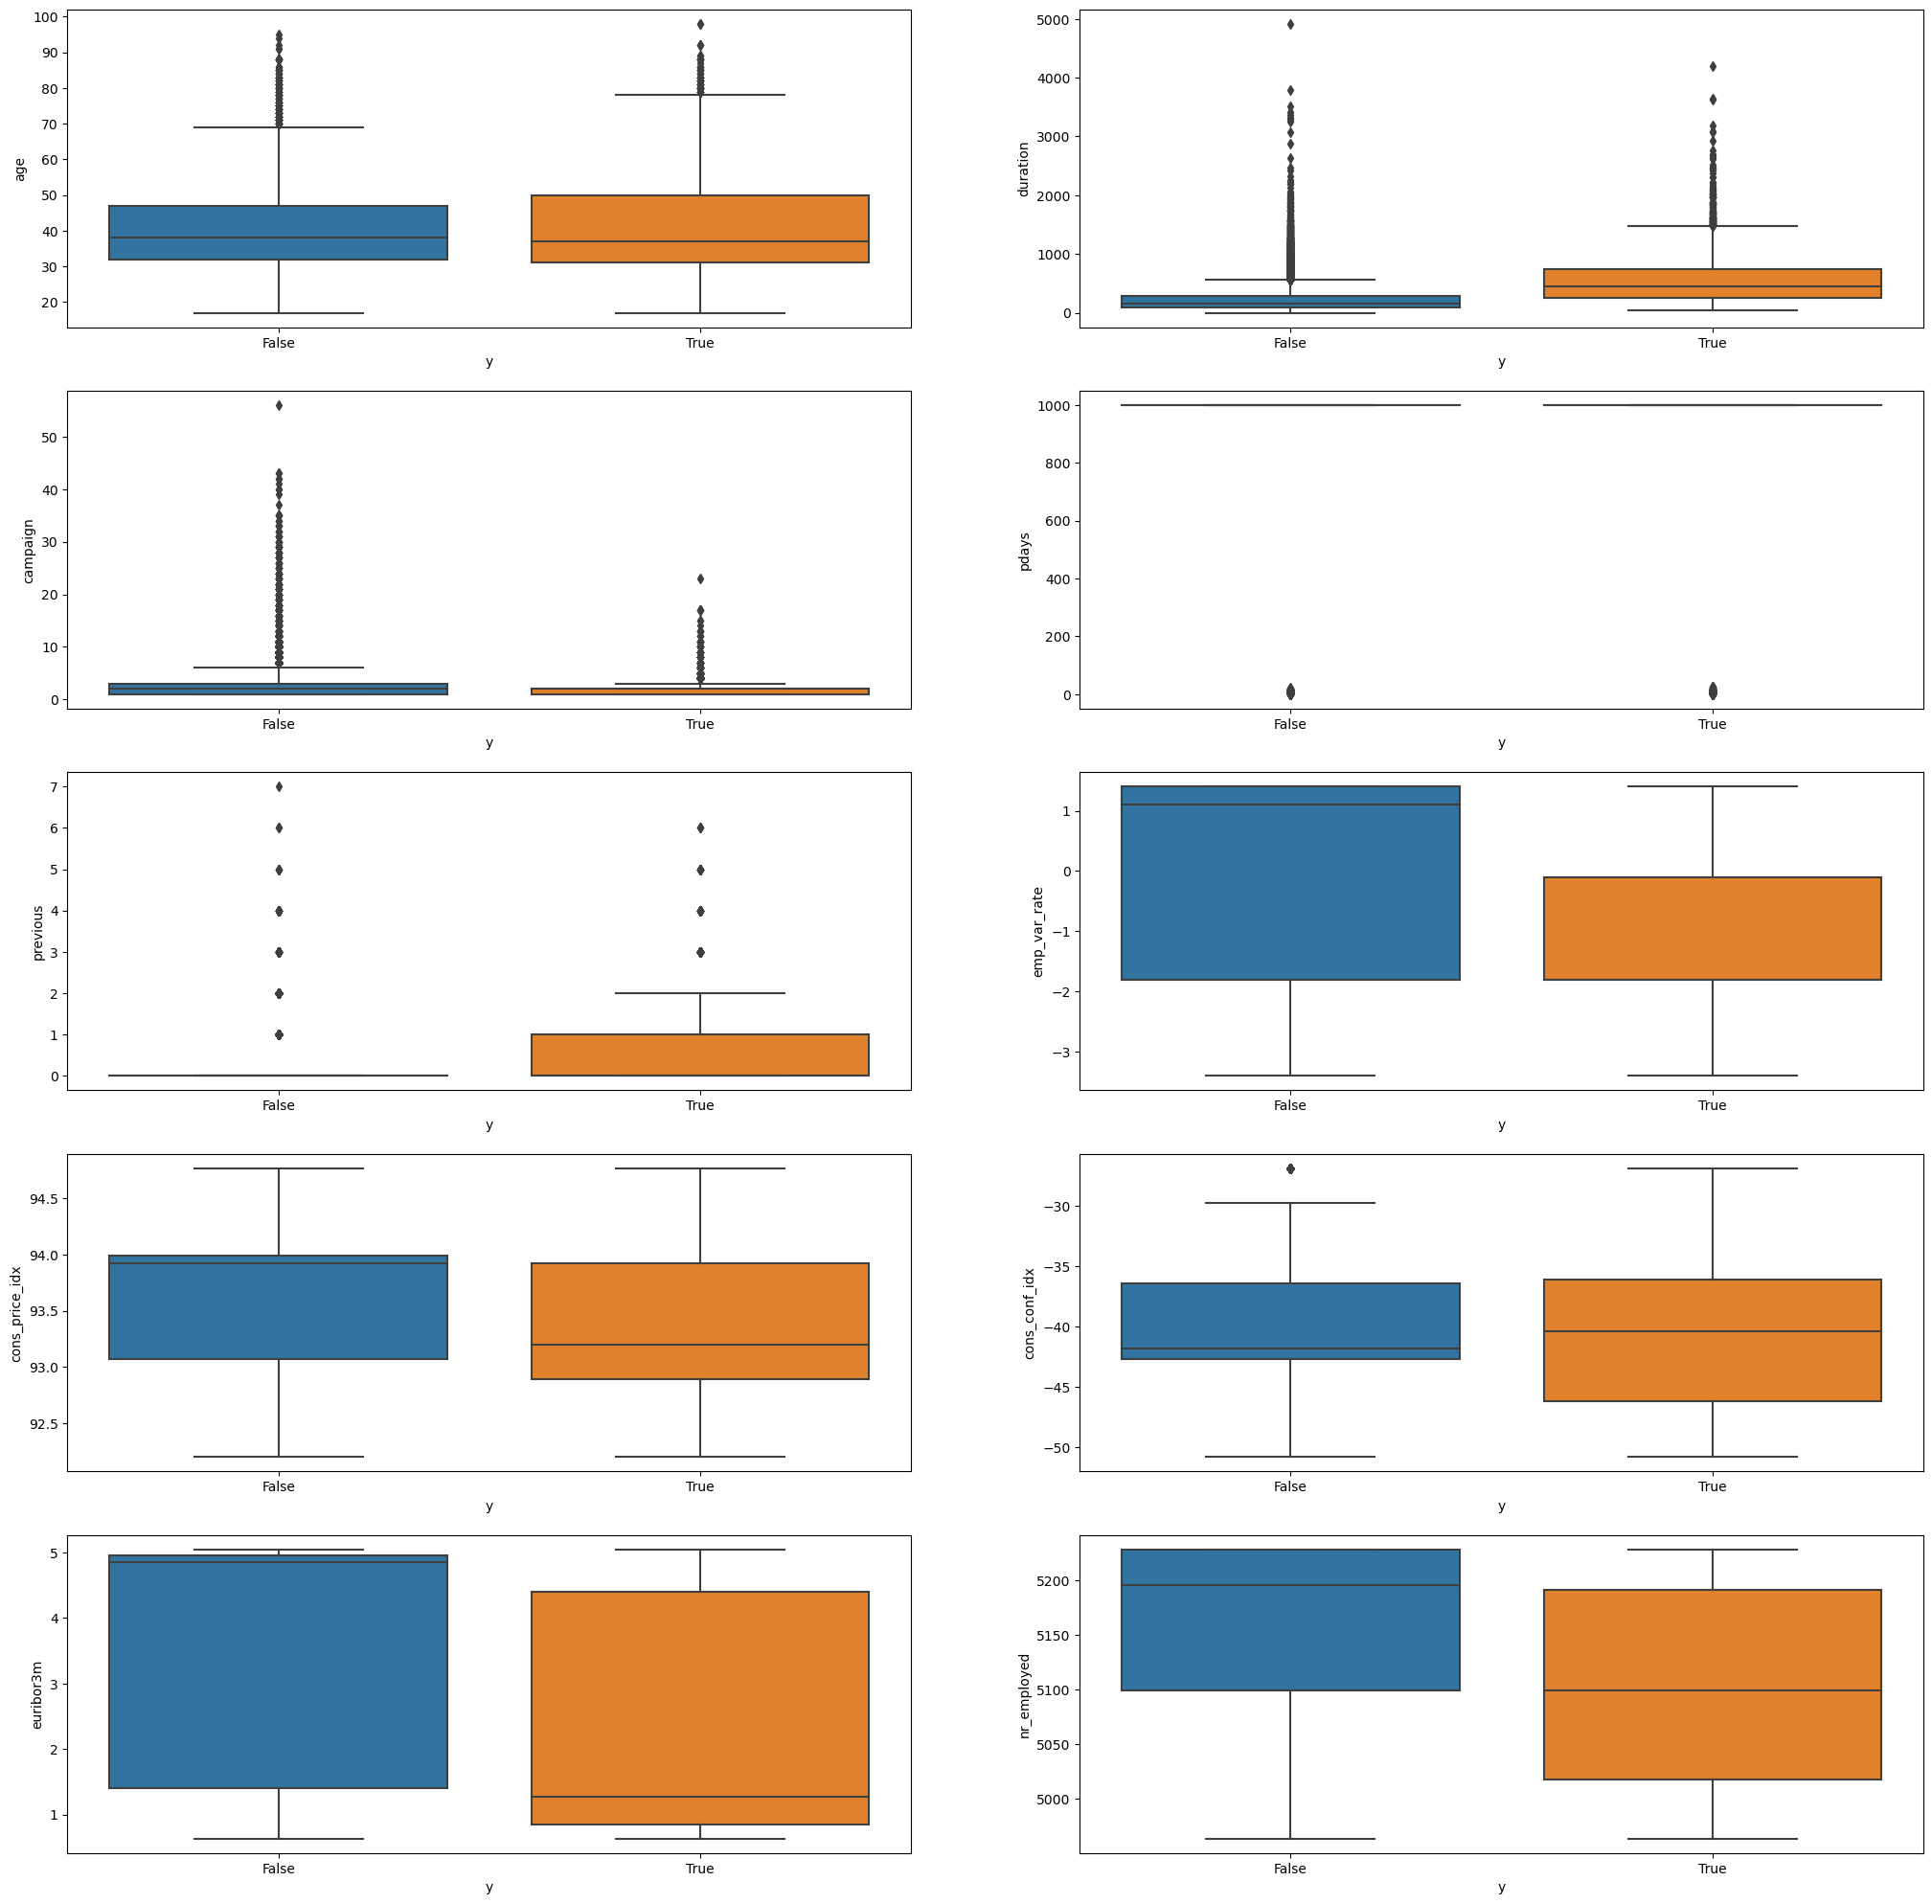

In [30]:
fig, axs = plt.subplots(5, 2, figsize=(25, 25))
sns.boxplot(x=a["y"],y=a["age"], ax=axs[0, 0])
sns.boxplot(x=a["y"],y=a["duration"],  ax=axs[0, 1])
sns.boxplot(x=a["y"],y=a["campaign"], ax=axs[1, 0])
sns.boxplot(x=a["y"],y=a["pdays"], ax=axs[1, 1])
sns.boxplot(x=a["y"],y=a["previous"],  ax=axs[2, 0])
sns.boxplot(x=a["y"],y=a["emp_var_rate"], ax=axs[2, 1])
sns.boxplot(x=a["y"],y=a["cons_price_idx"], ax=axs[3, 0])
sns.boxplot(x=a["y"],y=a["cons_conf_idx"],  ax=axs[3, 1])
sns.boxplot(x=a["y"],y=a["euribor3m"], ax=axs[4, 0])
sns.boxplot(x=a["y"],y=a["nr_employed"], ax=axs[4, 1])